In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump, load

In [2]:
advertising_df = pd.read_csv("../data/Advertising.csv")
advertising_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = advertising_df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [4]:
y = advertising_df['sales']

## Initial Polinomial Model

In [5]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [6]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [7]:
poly_features = polynomial_converter.transform(X)
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [10]:
test_predictions = model.predict(X_test)
test_predictions

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [11]:
MAE = mean_absolute_error(test_predictions, y_test)
MAE

0.4896798044803672

In [12]:
MSE = mean_squared_error(test_predictions, y_test)
MSE

0.44175055104035066

In [13]:
RMSE = np.sqrt(MSE)
RMSE

0.6646431757269089

#### Observação !
Se comparares os erros com o notebook 00 irás reparar que este modelo tems os valores mais baixos, ou seja, comporta-se melhor.

### Choosing the degree of the Polynomial

In [20]:
# Create the different order polynomal
# Split polynomial features in training/test sets
# fit on train
# store/save the rmse for both train and test
# Plot the results (error vs polynomial order)

train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train) 
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(train_predictions, y_train))
    test_rmse = np.sqrt(mean_squared_error(test_predictions, y_test))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

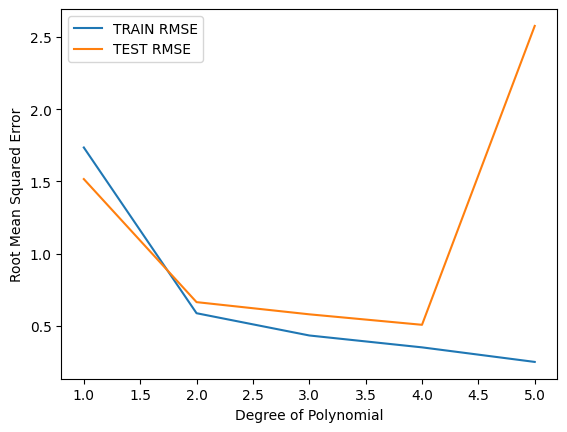

In [24]:
plt.plot(range(1,6), train_rmse_errors[:5], label="TRAIN RMSE")
plt.plot(range(1,6), test_rmse_errors[:5], label="TEST RMSE")
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Degree of Polynomial')
plt.legend()

### Observation
1. Looking into the blue line, we see that it's constantly going down, so the model is fitting to the data.
2. Looking into the orange line, we see it goes down until we get to the 4th degree polinomial, then it explodes. So after this degree error explodes indicating that      after this point the model is overfitting

### Discussion
Question which degree should we select ?
By looking at the model we see that degree 4 is the best both in train and test, but do we need a model more complex just to gain 0.5 value in error ?
Probabily not. It's in here that the domain model helps.
The tutor sugestion was 2nd or 3rd degree, and selected degree = 2

## Model Deployment

In [28]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
final_model = LinearRegression()
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [35]:
loaded_converter = load('final_converter.joblib')
loaded_model = load('final_poly_model.joblib')

In [33]:
dump(final_model, 'final_poly_model.joblib')
print('final_model')
dump(final_poly_converter, 'final_converter.joblib')
print('final_poly_converter')

final_model
final_poly_converter
